<a href="https://colab.research.google.com/github/zhangxs131/Machine_learning_notebook/blob/main/lr_base.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Logistic Regressing

逻辑回归

就是初步的MLP，使用sigmoid作为激活函数的二分类

计算loss，然后梯度上升进行修改weight，最后达到近似最优解的weight。

In [1]:
#获取数据集
!wget https://raw.githubusercontent.com/Jack-Cherish/Machine-Learning/master/Logistic/testSet.txt

--2022-04-29 02:41:33--  https://raw.githubusercontent.com/Jack-Cherish/Machine-Learning/master/Logistic/testSet.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2087 (2.0K) [text/plain]
Saving to: ‘testSet.txt’

testSet.txt         100%[===================>]   2.04K  --.-KB/s    in 0s      

2022-04-29 02:41:33 (14.9 MB/s) - ‘testSet.txt’ saved [2087/2087]



In [25]:
#处理数据
import numpy as np


def get_matrix(file_name):
  with open(file_name,'r') as f:
    content=f.readlines()

  label=[]
  data=np.zeros((len(content),3))
  for id,i in enumerate(content):
    t=i.strip().split('\t')
    data[id]=[1.0]+[float(j) for j in t[:-1]]  
    label.append(float(t[-1]))
  return data,label



[[ 4.12414349]
 [ 0.48007329]
 [-0.6168482 ]]


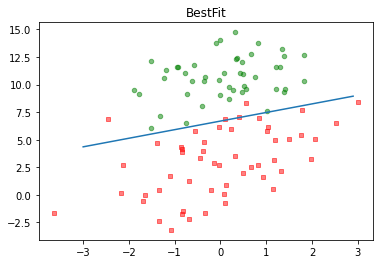

In [31]:
import matplotlib.pyplot as plt

def sigmoid(x):
  return 1.0/(1+np.exp(-x))

#梯度上升算法
def gradAscent(data,label):
  data=np.mat(data)
  label=np.mat(label).transpose()

  m,n=data.shape
  alpha=0.001
  max_cycle=500
  w=np.ones((n,1))  #参数初始化 b,w1,w2

  for i in range(max_cycle):
    h=sigmoid(data*w)
    loss=label-h
    w=w+alpha*data.transpose()*loss
  return w.getA()

def plot_best(data,label,weights):
  n=data.shape[0]
  data=np.array(data)
  xcord1=[]
  ycord1=[]
  xcord2=[]
  ycord2=[]
  for i in range(n):
    if int(label[i])==1:
      xcord1.append(data[i,1])
      ycord1.append(data[i,2])
    else:
      xcord2.append(data[i,1])
      ycord2.append(data[i,2])
  fig=plt.figure()
  plt.scatter(xcord1,ycord1,s=20,c='red',marker='s',alpha=.5)
  plt.scatter(xcord2,ycord2,s=20,c='green',alpha=.5)

  x=np.arange(-3.0,3.0,0.1)
  y=(-weights[0]-weights[1]*x)/weights[2] #根据b,w1,w2求直线 w2y+w1x+b=0 
  plt.plot(x,y)
  plt.title('BestFit')
  plt.show()

data,label=get_matrix('testSet.txt')
w=gradAscent(data,label)
print(w)
plot_best(data,label,w)